In [0]:
from IPython.display import clear_output

In [0]:
!pip3 install pycodestyle flake8 pycodestyle_magic
clear_output()

In [0]:
%load_ext pycodestyle_magic

# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import chain
from warnings import filterwarnings
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [0]:
filterwarnings("ignore")

In [0]:
mpl.rcParams['figure.figsize'] = [12.8, 9.6]
mpl.rcParams['lines.markersize'] = 3

color_map = mpl.colors.ListedColormap(['red', 'blue'])

In [0]:
regr_params = {'clf__penalty': ['l1', 'l2', 'none'],
               'clf__C': np.arange(.01, 10.0, .01),
               'clf__fit_intercept': [True, False],
               'clf__solver': ['newton-cg', 'lbfgs',
                               'liblinear', 'sag', 'saga'],
               'clf__max_iter': np.arange(50, 500, 50)}

knn_params = {'clf__n_neighbors': np.arange(1, 30),
              'clf__weights': ['uniform', 'distance'],
              'clf__algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'clf__leaf_size': np.arange(10, 100, 10)}

####**1. Create dataset for binary classification task (binary crossentropy), where k-NN perfoms worse than logistic regression**

При логистической регрессии мы предполагаем, что разделение данных на классы хорошо аппроксимируется прямой, а при методе k ближайших соседей – что объекты одного класса образуют между собой много кластеров, в которых не встречается объектов другого класса. Поэтому самый простой пример данных, на которых логистическая регрессия достигнет лучших результатов, чем метод k ближайших соседей – линейно разделимая выборка, в которой объекты одного класса не образуют между собой кластеров. Пример – две очень близкие друг к другу параллельные прямые, на каждой из которых лежат объекты соответствующего класса.

In [0]:
k, b = np.random.randint(1, 10), np.random.randint(10)
X = np.array(list(chain.from_iterable(((x, x * k + b),
                                       (x, x * k + b + 10.0)
                                       ) for x in range(100))),
             dtype=np.dtype(float))
y = np.array(list(chain.from_iterable((0, 1) for x in range(100))))

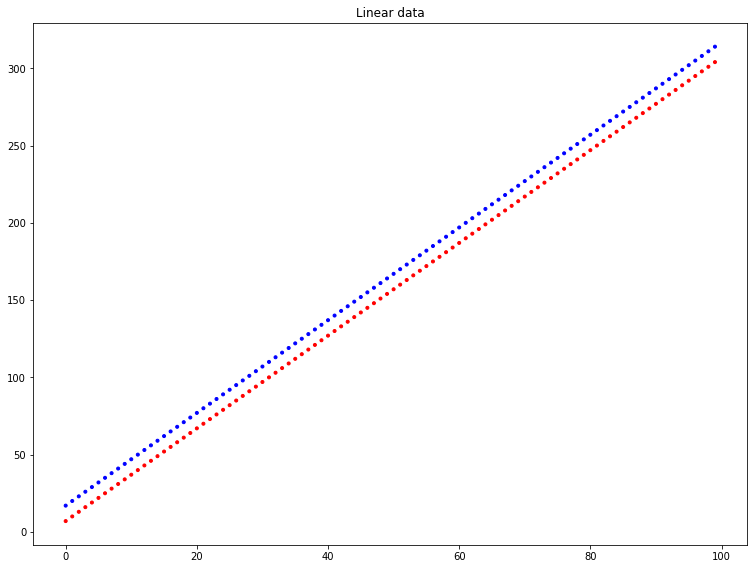

In [24]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color_map)
plt.title("Linear data")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
LogRedPipeline = Pipeline([('scaler', StandardScaler()),
                           ('clf', LogisticRegression())])

KNeighborsPipeline = Pipeline([('scaler', StandardScaler()),
                               ('clf', KNeighborsClassifier())])


LogRegCV = GridSearchCV(LogRedPipeline, regr_params, n_jobs=-1,
                        cv=5, verbose=1, error_score=-np.Inf)

KNeighborsCV = GridSearchCV(KNeighborsPipeline, knn_params, n_jobs=-1,
                            cv=5, verbose=1, error_score=-np.Inf)

In [0]:
LogRegCV.fit(X_train, y_train)
LogReg = LogRegCV.best_estimator_
print(f"Best parameters: {LogRegCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {LogRegCV.best_score_}")
print(f"Test accuracy: {LogReg.score(X_test, y_test)}")

Fitting 5 folds for each of 269730 candidates, totalling 1348650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 13384 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 24584 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 38984 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 56584 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 77384 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 101384 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 128584 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 158984 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 192584 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 229384 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 269384 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 312584 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: D

Best parameters: {'clf__C': 0.01, 'clf__fit_intercept': True, 'clf__max_iter': 50, 'clf__penalty': 'none', 'clf__solver': 'newton-cg'}
Best mean accuracy on cross-validation: 1.0
Test accuracy: 1.0


Логистическая регрессия справляется идеально.

In [0]:
KNeighborsCV.fit(X_train, y_train)
KNeighbors = KNeighborsCV.best_estimator_
print(f"Best parameters: {KNeighborsCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {KNeighborsCV.best_score_}")
print(f"Test accuracy: {KNeighbors.score(X_test, y_test)}")

Fitting 5 folds for each of 1512 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   18.0s


Best parameters: {'clf__algorithm': 'ball_tree', 'clf__leaf_size': 10, 'clf__n_neighbors': 2, 'clf__weights': 'distance'}
Best mean accuracy on cross-validation: 0.9066666666666666
Test accuracy: 0.9


[Parallel(n_jobs=-1)]: Done 7560 out of 7560 | elapsed:   24.6s finished


А вот KNeighborsClassifier – уже чуть хуже.

####**2. Create dataset for binary classification task (binary crossentropy), where logistic regression perfoms worse than k-NN**
С помощью **sklearn.datasets.make_blobs** сгенерируем линейно неразделимую выборку, в которой объекты одного класса будут образовывать между собой несколько кластеров.

In [0]:
X, y = zip(*[make_blobs(centers=2) for i in range(4)])
X = np.vstack(X)
y = np.hstack(y)

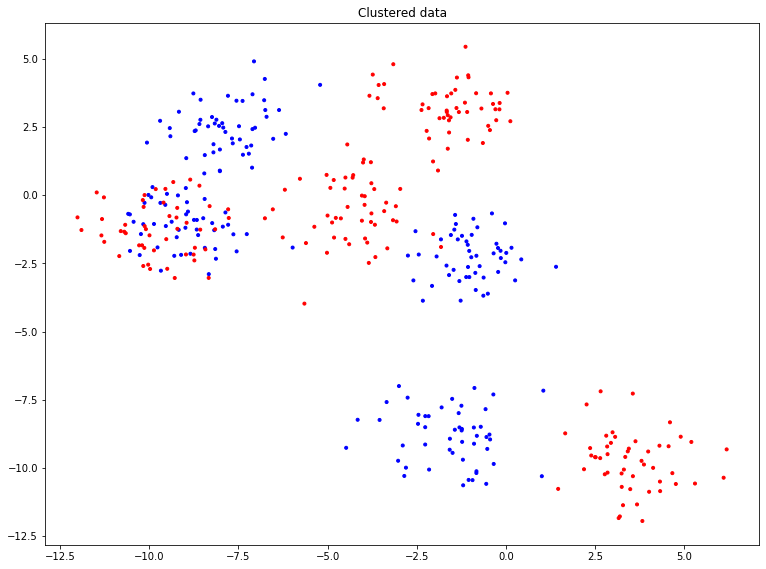

In [26]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color_map)
plt.title("Clustered data")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
LogRedPipeline = Pipeline([('scaler', StandardScaler()),
                           ('clf', LogisticRegression())])

KNeighborsPipeline = Pipeline([('scaler', StandardScaler()),
                               ('clf', KNeighborsClassifier())])


LogRegCV = GridSearchCV(LogRedPipeline, regr_params, n_jobs=-1,
                        cv=5, verbose=1, error_score=-np.Inf)

KNeighborsCV = GridSearchCV(KNeighborsPipeline, knn_params, n_jobs=-1,
                            cv=5, verbose=1, error_score=-np.Inf)

In [12]:
KNeighborsCV.fit(X_train, y_train)
KNeighbors = KNeighborsCV.best_estimator_
print(f"Best parameters: {KNeighborsCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {KNeighborsCV.best_score_}")
print(f"Test accuracy: {KNeighbors.score(X_test, y_test)}")

Fitting 5 folds for each of 1566 candidates, totalling 7830 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   20.8s


Best parameters: {'clf__algorithm': 'ball_tree', 'clf__leaf_size': 10, 'clf__n_neighbors': 4, 'clf__weights': 'distance'}
Best mean accuracy on cross-validation: 0.9666666666666667
Test accuracy: 0.97


[Parallel(n_jobs=-1)]: Done 7830 out of 7830 | elapsed:   29.6s finished


Как и ожидалось, KNeighborsClassifier с такими данными справляется очень хорошо.

In [13]:
LogRegCV.fit(X_train, y_train)
LogReg = LogRegCV.best_estimator_
print(f"Best parameters: {LogRegCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {LogRegCV.best_score_}")
print(f"Test accuracy: {LogReg.score(X_test, y_test)}")

Fitting 5 folds for each of 269730 candidates, totalling 1348650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 24522 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 38922 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 56522 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 77322 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 101322 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 128522 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 158922 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 192522 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 229322 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 269322 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 312522 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: D

Best parameters: {'clf__C': 0.01, 'clf__fit_intercept': True, 'clf__max_iter': 50, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Best mean accuracy on cross-validation: 0.8566666666666667
Test accuracy: 0.87


А вот логистическая регрессия – уже хуже.

####**3. Create dataset for binary classification task (binary crossentropy), where k-NN with cosine distance perfoms better than k-NN with euclidean distance**

Евклидовое расстояние учитывает расположение точек на плоскости, а косинусное – только угол между точками. Соответственно, чтобы косинусная мера дала лучший результат, чем евклидова, точки разных классов должны находиться достаточно близко друг к другу, но при этом лежать на разнонаправленных векторах. Самый простой пример такой выборки – две очень близкие друг к другу **не** параллельные прямые, на каждой из которых лежат объекты соответствующего класса, причём чем ближе к центру пересечения, тем более плотно расположены точки (воспользуемся нормальным распределением).

In [0]:
k, b = np.random.randint(1, 10), np.random.randint(10)
k_diff = np.random.sample() - 0.5
X = np.array(list(chain.from_iterable(((x, x * k + b),
                                       (x, x * (k + k_diff) + b)
                                       ) for x in np.random.normal(
                                           0, 1, size=(1000,)))),
             dtype=np.dtype(float))
y = np.array(list(chain.from_iterable((0, 1) for x in range(1000))))

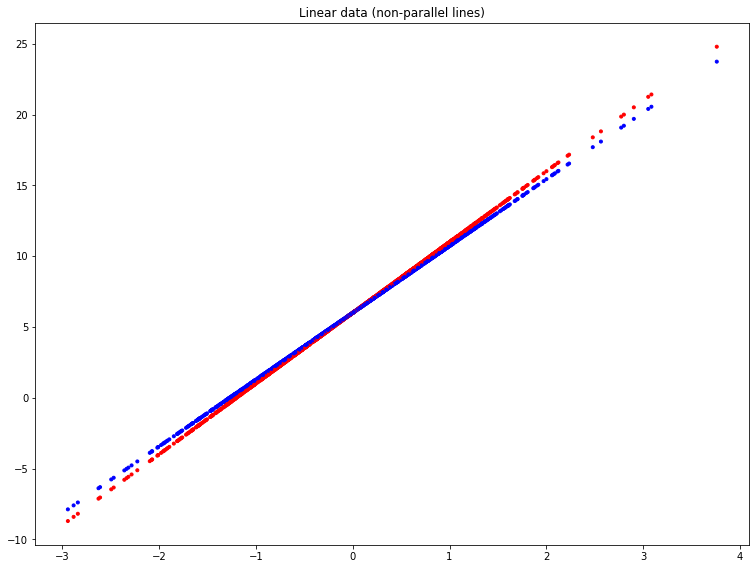

In [60]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=color_map)
plt.title("Linear data (non-parallel lines)")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
KNNEuclPipeline = Pipeline([('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

KNNCosPipeline = Pipeline([('scaler', StandardScaler()),
                           ('clf', KNeighborsClassifier(metric='cosine'))])


KNNEuclCV = GridSearchCV(KNNEuclPipeline, knn_params, n_jobs=-1,
                         cv=10, verbose=1, error_score=-np.Inf)

KNNCosCV = GridSearchCV(KNNCosPipeline, knn_params, n_jobs=-1,
                        cv=10, verbose=1, error_score=-np.Inf)

In [63]:
KNNCosCV.fit(X_train, y_train)
KNNCos = KNNCosCV.best_estimator_
print(f"Best parameters: {KNNCosCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {KNNCosCV.best_score_}")
print(f"Test accuracy: {KNNCos.score(X_test, y_test)}")

Fitting 10 folds for each of 1566 candidates, totalling 15660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 10504 tasks      | elapsed:   25.6s


Best parameters: {'clf__algorithm': 'brute', 'clf__leaf_size': 10, 'clf__n_neighbors': 3, 'clf__weights': 'uniform'}
Best mean accuracy on cross-validation: 0.98
Test accuracy: 0.986


[Parallel(n_jobs=-1)]: Done 15660 out of 15660 | elapsed:  1.1min finished


In [64]:
KNNEuclCV.fit(X_train, y_train)
KNNEucl = KNNEuclCV.best_estimator_
print(f"Best parameters: {KNNEuclCV.best_params_}")
print(f"Best mean accuracy on cross-validation: {KNNEuclCV.best_score_}")
print(f"Test accuracy: {KNNEucl.score(X_test, y_test)}")

Fitting 10 folds for each of 1566 candidates, totalling 15660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 6730 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 12330 tasks      | elapsed:  1.3min


Best parameters: {'clf__algorithm': 'ball_tree', 'clf__leaf_size': 10, 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Best mean accuracy on cross-validation: 0.944
Test accuracy: 0.942


[Parallel(n_jobs=-1)]: Done 15660 out of 15660 | elapsed:  1.7min finished


Действительно, на таких данных евклидова мера работает немного хуже косинусной.